In [2]:
import numpy as np

import galprime as gp

import photutils 

50


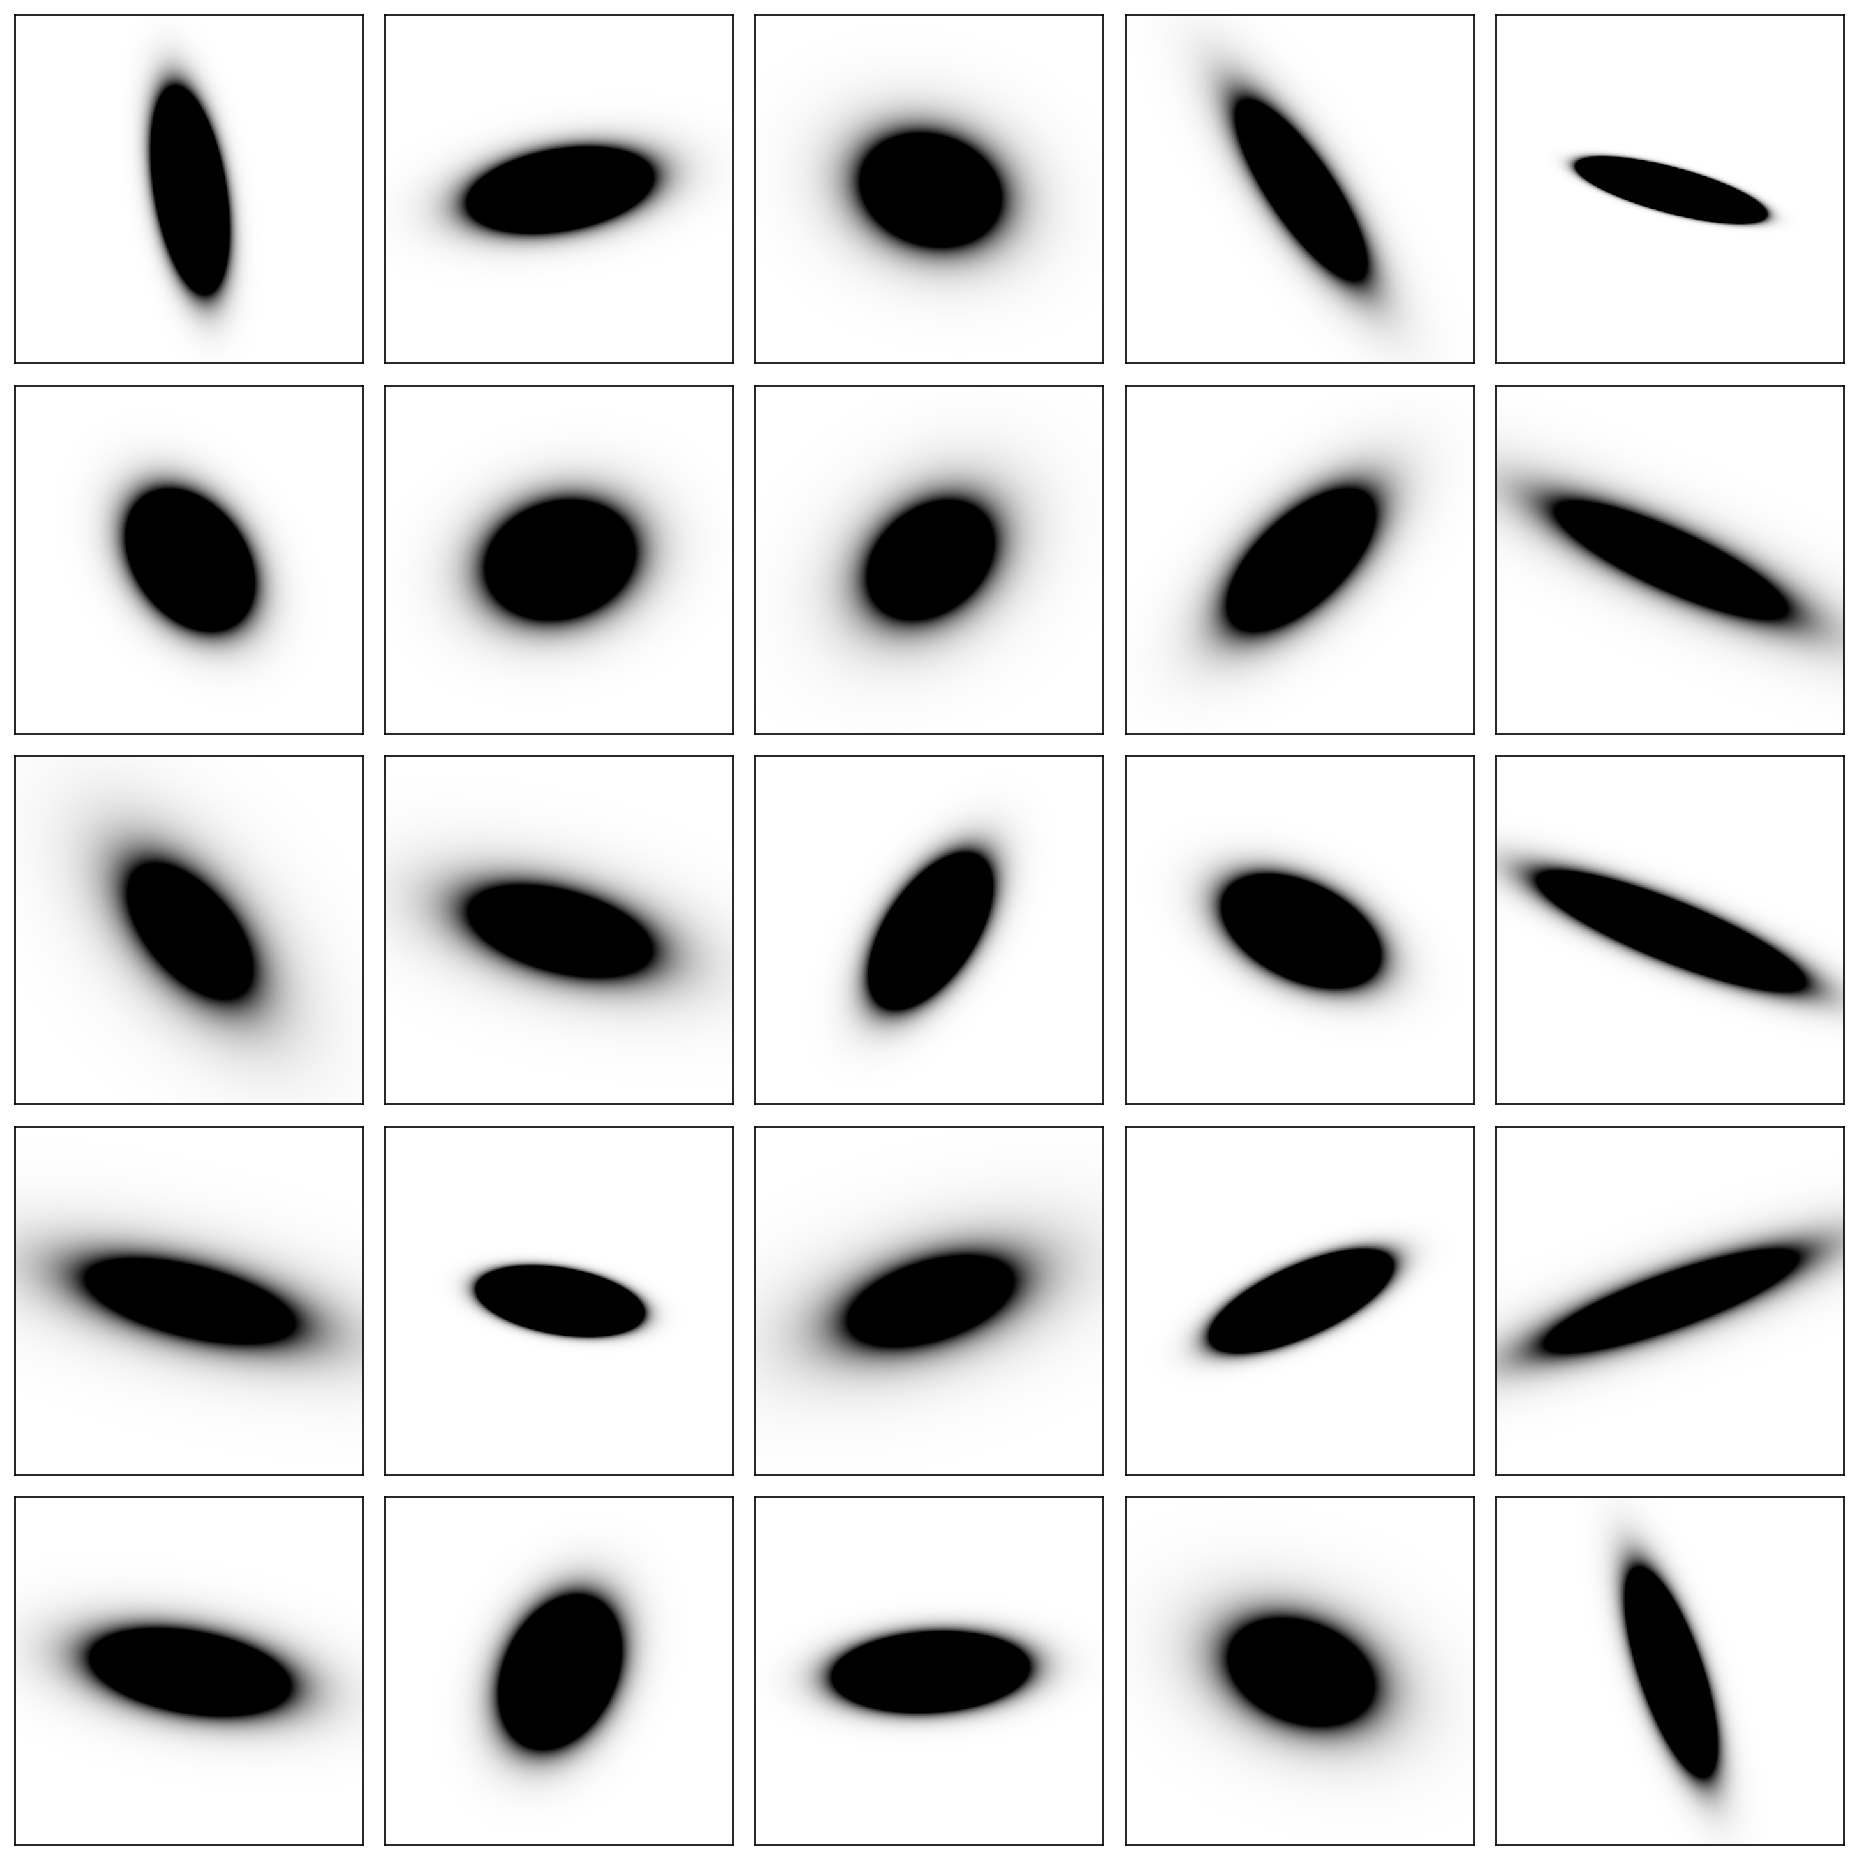

In [3]:
models = gp.gen_sersic_models(width=151)

gp.plotting.show_cutouts(models)

In [23]:
# Utility functions


def ellipse_coords(isophote, min_samples=10, asint=False):
    x0, y0, r, pa, eps = isophote.x0, isophote.y0, isophote.r, isophote.pa, isophote.eps

    theta_samples = np.linspace(0, 2*np.pi, np.max([min_samples, int(2*np.pi*r)]))

    b = r * (1 - eps)
    
    # Convert angles to numpy array
    theta = np.array(theta_samples)
    
    # Calculate ellipse coordinates in the ellipse's intrinsic coordinate system
    x_prime, y_prime = r * np.cos(theta), b * np.cos(theta)
    
    # Rotate the coordinates by the position angle
    cos_pa, sin_pa = np.cos(pa), np.sin(pa)

    x_rotated = x_prime * cos_pa - y_prime * sin_pa
    y_rotated = x_prime * sin_pa + y_prime * cos_pa
    
    # Translate the coordinates to the center (x0, y0)
    x, y = x0 + x_rotated, y0 + y_rotated

    if asint:
        return np.stack([x, y]).astype(int)
    else:
        return np.stack([x, y])

def sample(image, isophote, min_samples=10):

    x, y = ellipse_coords(isophote, min_samples=min_samples)
    print(x.shape)

    # Remove points outside the image
    mask = (x >= 0) & (x < image.shape[1]) & (y >= 0) & (y < image.shape[0])
    x, y = x[mask], y[mask]

    return image[x][y]


In [24]:
class IsophoteFitter:
    # [x0, y0, r, ell, pa]
    def __init__(self, data, init_guess=None, **kwargs):
        self.data = data
        self.init_guess = init_guess

        self.isophotes = []

    def fit(self):
        samp = sample(self.data, self.init_guess)
        

    def fit_single(data, guess):
        pass


class Isophote:
    def __init__(self, x0=None, y0=None, r=None, eps=None, pa=None):
        self.x0 = x0
        self.y0 = y0
        self.r = r
        self.eps = eps
        self.pa = pa

cutout = models.cutouts[0]
test = IsophoteFitter(cutout, init_guess=Isophote(x0=cutout.shape[0] / 2, y0=cutout.shape[1] / 2, r=10, eps=0.5, pa=0))

test.fit()



(62,)


IndexError: arrays used as indices must be of integer (or boolean) type